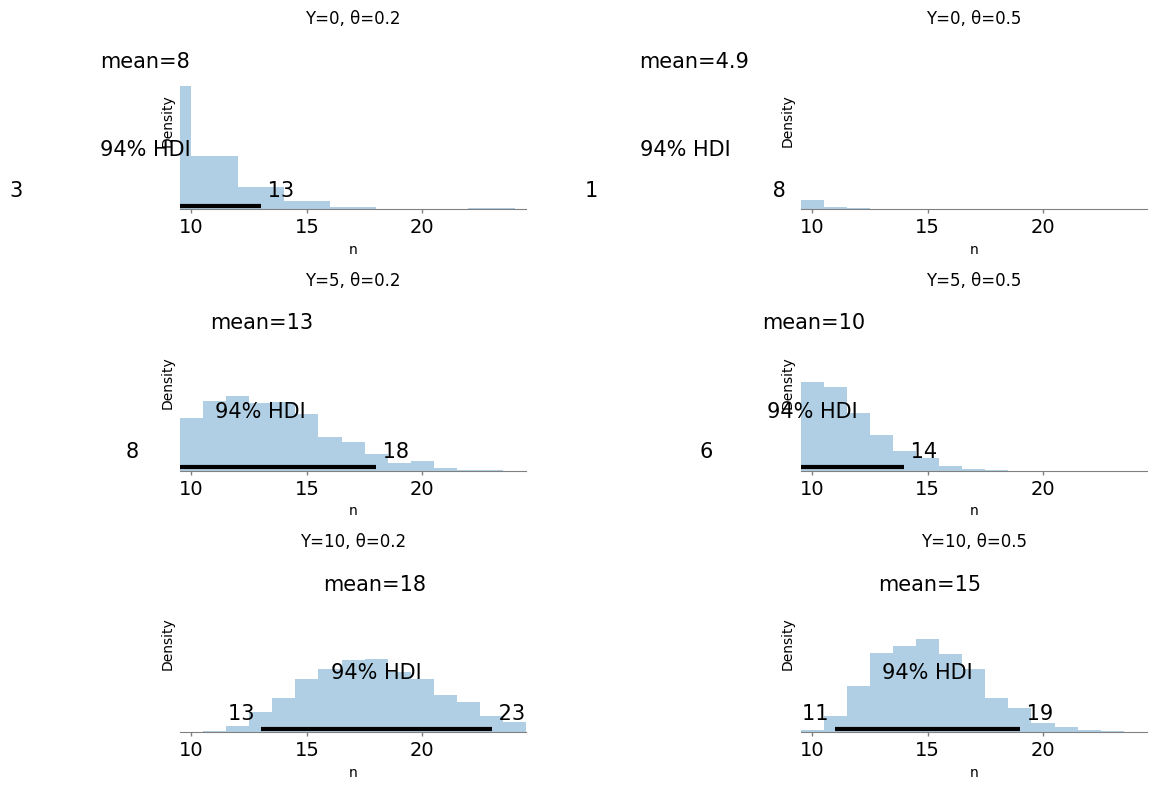

In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

Y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

# matrice cu distributiile a posteriori
posterior_results = []

# crearea a cate unui model pt fiecare combinatie (Y, theta)
for Y in Y_values:
    for theta in theta_values:
        with pm.Model() as model:
            # Prior pt nr total de clienti (n)
            n = pm.Poisson("n", mu=10)

            # Likelihood pt nr de cumparatori (Y)
            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            # Sampling din distr a posteriori
            trace = pm.sample(2000, return_inferencedata=True, progressbar=False)

        posterior_results.append((Y, theta, trace))

# Vizualizare a posteriori pt toate combinatiile de (Y, theta)
fig, axes = plt.subplots(len(Y_values), len(theta_values), figsize=(12, 8), sharex=True, sharey=True)
for i, Y in enumerate(Y_values):
    for j, theta in enumerate(theta_values):
        ax = axes[i, j]
        trace = posterior_results[i * len(theta_values) + j][2]
        az.plot_posterior(trace, var_names=["n"], ax=ax, hdi_prob=0.94)
        ax.set_title(f"Y={Y}, θ={theta}")
        ax.set_xlabel("n")
        ax.set_ylabel("Density")

plt.tight_layout()
plt.show()